In [4]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
url = './time_series_covid19_confirmed_US.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
# death = pd.read_csv(url, error_bad_lines=False)
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
# recover = pd.read_csv(url, error_bad_lines=False)

# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'time_series_covid19_deaths_US.csv'
death = pd.read_csv(url, error_bad_lines=False)
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
# recover = pd.read_csv(url, error_bad_lines=False)

# fix region names
# confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
# confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "Unites States")
# death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
# death['Country/Region']= death['Country/Region'].str.replace("US", "Unites States")
# recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
# recover['Country/Region']= recover['Country/Region'].str.replace("US", "Unites States")

In [5]:
# Get population
population=pd.read_csv('./population.csv', sep=',', encoding='latin1')
confirmed=pd.merge(confirmed, population,how='left' ,on=['Combined_Key'])
death=pd.merge(death, population,how='left' ,on=['Combined_Key'])
# recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [6]:
# merge region
confirmed['region'] = confirmed['Combined_Key'].map(str)
confirmed['region']= confirmed['region'].str.replace(" ", "_")
confirmed['region']= confirmed['region'].str.replace(",", "")
death['region'] = death['Combined_Key'].map(str)
death['region']= death['region'].str.replace(" ", "_")
death['region']= death['region'].str.replace(",", "")
# recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:5,:]

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,Population,region
0,"American Samoa, US",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,55641,American_Samoa_US
1,"Guam, US",0,0,0,0,0,0,0,0,0,...,45,51,55,56,58,69,77,82,164229,Guam_US
2,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,6,6,55144,Northern_Mariana_Islands_US
3,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,...,64,79,100,127,174,239,286,316,2933408,Puerto_Rico_US
4,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,...,17,19,22,0,0,30,30,30,107268,Virgin_Islands_US


In [7]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Combined_Key', 'Population'], axis=1)
#   ts=ts.drop(['Combined_Key',], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
#   print(ts)
  return (ts)

In [8]:
ts=create_ts(confirmed)
ts_d=create_ts(death)
# print(ts)
# ts_rec=create_ts(recover)

Text(0.5, 1.0, 'Daily Total Death - Major areas')

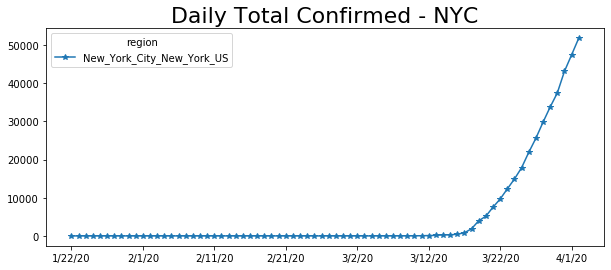

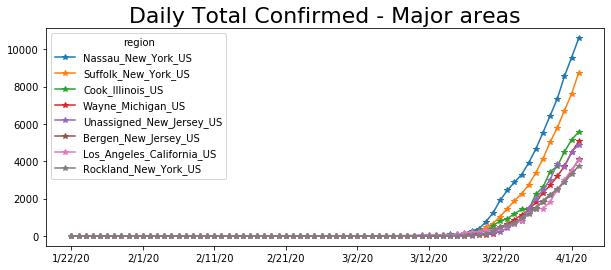

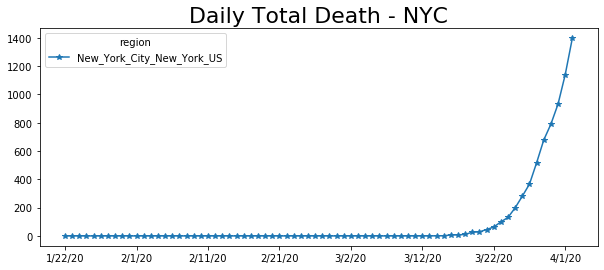

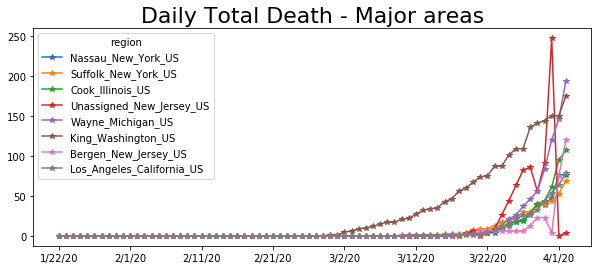

In [9]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - NYC',fontdict={'fontsize': 22})
p.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Confirmed - Major areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - NYC',fontdict={'fontsize': 22})
p_d.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Death - Major areas',fontdict={'fontsize': 22})

# p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
# p_r.iloc[:,:1].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Hubei',fontdict={'fontsize': 22})
# p_r.iloc[:,2:10].plot(marker='*',figsize=(10,4)).set_title('Daily Total Recoverd - Major areas',fontdict={'fontsize': 22})

In [10]:
# Create data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv('./testing.csv')

In [11]:
import rpy2
%load_ext rpy2.ipython

C:\Users\Owner\anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [9]:
%%R
install.packages('pracma')
install.packages('reshape')

In [12]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("./testing.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

In [13]:
p=%R pred_all

In [14]:
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)

temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

In [12]:
w=pd.read_csv('./w_small.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('./w_forecast_small.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [15]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
#     t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
    t.loc[len(t)+1] = [t.iloc[i-1,0],t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)
print(range(1,len(t)))


range(1, 237469)


In [16]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3] = t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6] = ((t.iloc[i-1,2] + 10 ) / (t.iloc[i-2,2]-1 + 10))*100
    t.iloc[i,9] = t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4] = t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7] = ((t.iloc[i-1,2] + 10 )/(t.iloc[i-4,2]-1 + 10))*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5] = t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8] = ((t.iloc[i-1,2] + 10)/(t.iloc[i-8,2]-1 + 10))*100
t=t.fillna(0) 
# print(t['date'])
t['date'] = pd.to_datetime(t['date'], errors ='coerce')
t = t.merge(temp[['date','region', 'X']], how='left', on=['date','region'])
t = t.rename(columns = {'X':'kalman_prediction'}) 
t = t.replace([np.inf, -np.inf], 0)
t['kalman_prediction'] = round(t['kalman_prediction'])
train = t.merge(confirmed[['region','Population']], how='left', on='region')
train = train.rename(columns = {'Population':'population'})
train['population'] = str(train['population']).replace(r" ", '')
train['population'] = train['population'].replace(r",", '')
train['population'] = train['population'].fillna(1)

# print(train['population'])
train['population'] = pd.to_numeric(train['population'], errors='coerce')
train['population'] = train['population'].fillna(1)

train['infected_rate'] = train['last_day']/train['population'] * 10000
# train = train.merge(w, how ='left', on = ['date','region'])
train = train.sort_values(['region', 'date'])
print(range(0,len(train)))
print(train)
### fill missing weather 
# for i in range(0,len(train)):
#   if(np.isnan(train.iloc[i,13])):
#     if(train.iloc[i,1] is train.iloc[i-1,1]):
#       train.iloc[i,13]=train.iloc[i-1,13]
#       train.iloc[i,14]=train.iloc[i-1,14]

range(0, 237469)
             date                       region  confirmed  1_day_change  \
0      2020-01-22  Abbeville_South_Carolina_US          0             0   
1      2020-01-23  Abbeville_South_Carolina_US          0             0   
2      2020-01-24  Abbeville_South_Carolina_US          0             0   
3      2020-01-25  Abbeville_South_Carolina_US          0             0   
4      2020-01-26  Abbeville_South_Carolina_US          0             0   
...           ...                          ...        ...           ...   
237464 2020-03-30      Ziebach_South_Dakota_US          0             0   
237465 2020-03-31      Ziebach_South_Dakota_US          0             0   
237466 2020-04-01      Ziebach_South_Dakota_US          0             0   
237467 2020-04-02      Ziebach_South_Dakota_US          0             0   
237468 2020-04-02      Ziebach_South_Dakota_US          0             0   

        3_day_change  7_day_change  1_day_change_rate  3_day_change_rate  \
0     

              region          mse       rmse        mae
2405  Puerto_Rico_US  1340.430556  36.611891  10.652778


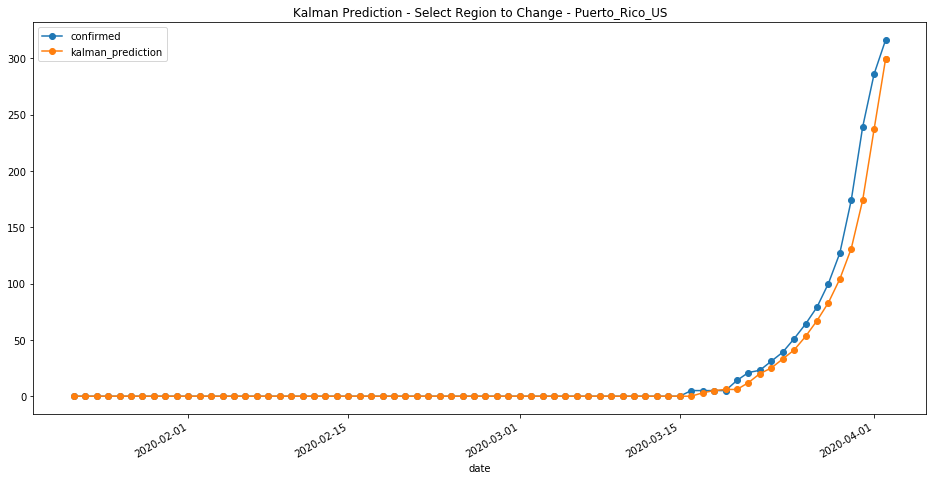

In [17]:
# print(t['kalman_prediction'])

region = 'Puerto_Rico_US'

evaluation = pd.DataFrame(columns = ['region','mse','rmse','mae'])
place = 0
for i in range(1,len(t)):
  if (t.iloc[i,1] is not t.iloc[i-1,1]):
    ex = np.array(t.iloc[i-len(ts):i,5])
    pred = np.array(t.iloc[i-len(ts):i,2])
    evaluation = evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p = t[t['region'] == region][['date','region','confirmed','kalman_prediction']]

# p = p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2] = None
p = p.set_index(['date'])
p.iloc[:,1:].plot(marker='o', figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region'] == p.iloc[0,0]])

                 region        mse      rmse       mae
3010  Virgin_Islands_US  36.263889  6.021951  1.930556


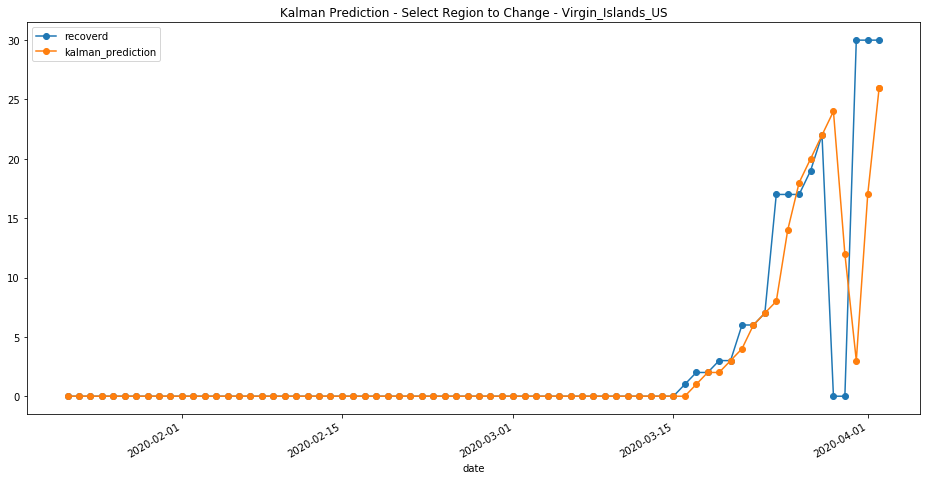

In [18]:
# print(t['kalman_prediction'])

region = 'Virgin_Islands_US'

evaluation = pd.DataFrame(columns = ['region','mse','rmse','mae'])
place = 0
for i in range(1,len(t)):
  if (t.iloc[i,1] is not t.iloc[i-1,1]):
    ex = np.array(t.iloc[i-len(ts):i,5])
    pred = np.array(t.iloc[i-len(ts):i,2])
    evaluation = evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p = t[t['region'] == region][['date','region','confirmed','kalman_prediction']]

p = p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2] = None
p = p.set_index(['date'])
p.iloc[:,1:].plot(marker='o', figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region'] == p.iloc[0,0]])

In [25]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='8G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 mins 49 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_Owner_3ar816
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.998 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [26]:
train = train.fillna(0) 
train_df = train[train['date'] < '2020-02-13']
boots = train_df[train_df['date'] >= '2020-02-13'] # some bootstrap to give more weight for recent days
train_df = train_df.append([boots[boots['date'] >= '2020-02-13']] * 1000, ignore_index=True)
train_df_peurto = train_df[train_df['region'] == 'Puerto_Rico_US']
test = train[train['date'] >= '2020-02-13']
test = test[test['date'] < '2020-02-15']

In [27]:
x_col=['1_day_change', '3_day_change','7_day_change', '7_day_change_rate', 
       'last_day', 'kalman_prediction','infected_rate'
      ]

In [28]:
x = train_df[x_col]
y = train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values
#pred2.iloc[:55]

In [31]:
train_h20 = h2o.H2OFrame(train_df)
train_h20_peurto = h2o.H2OFrame(train_df_peurto) # different model for peurto
training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)
model_peurto = H2ORandomForestEstimator(ntrees=500, max_depth=20)
model_peurto.train(x = training_columns, y = response_column, training_frame = train_h20_peurto)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


H2OResponseError: ModelBuilderErrorV3  (water.exceptions.H2OModelBuilderIllegalArgumentException):
    timestamp = 1586048814245
    error_url = '/3/ModelBuilders/drf'
    msg = 'Illegal argument(s) for DRF model: DRF_model_python_1586048369752_4.  Details: ERRR on field: _response: Response cannot be constant.'
    dev_msg = 'Illegal argument(s) for DRF model: DRF_model_python_1586048369752_4.  Details: ERRR on field: _response: Response cannot be constant.'
    http_status = 412
    values = {'messages': [{'_log_level': 5, '_field_name': '_keep_cross_validation_models', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_keep_cross_validation_predictions', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_keep_cross_validation_fold_assignment', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_fold_assignment', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_tweedie_power', '_message': 'Only for Tweedie Distribution.'}, {'_log_level': 2, '_field_name': '_train', '_message': 'Dropping bad and constant columns: [1_day_change, 7_day_change, 3_day_change, last_day, region, kalman_prediction, infected_rate]'}, {'_log_level': 5, '_field_name': '_tweedie_power', '_message': 'Tweedie power is only used for Tweedie distribution.'}, {'_log_level': 5, '_field_name': '_quantile_alpha', '_message': 'Quantile (alpha) is only used for Quantile regression.'}, {'_log_level': 1, '_field_name': '_response', '_message': 'Response cannot be constant.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Balance classes is false, hide max_after_balance_size'}, {'_log_level': 5, '_field_name': '_balance_classes', '_message': 'Balance classes is only applicable to classification problems.'}, {'_log_level': 5, '_field_name': '_class_sampling_factors', '_message': 'Class sampling factors is only applicable to classification problems.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Max after balance size is only applicable to classification problems.'}, {'_log_level': 5, '_field_name': '_max_confusion_matrix_size', '_message': 'Max confusion matrix size is only applicable to classification problems.'}, {'_log_level': 5, '_field_name': '_max_hit_ratio_k', '_message': 'Max K-value for hit ratio is only applicable to multi-class classification problems.'}, {'_log_level': 5, '_field_name': '_max_confusion_matrix_size', '_message': 'Only for multi-class classification problems.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Only used with balanced classes'}, {'_log_level': 5, '_field_name': '_class_sampling_factors', '_message': 'Class sampling factors is only applicable if balancing classes.'}], 'algo': 'DRF', 'parameters': {'_train': {'name': 'Key_Frame__upload_91c0378a0812fb9428382ff7d2864e6f.hex', 'type': 'Key'}, '_valid': None, '_nfolds': 0, '_keep_cross_validation_models': True, '_keep_cross_validation_predictions': False, '_keep_cross_validation_fold_assignment': False, '_parallelize_cross_validation': True, '_auto_rebalance': True, '_seed': -1, '_fold_assignment': 'AUTO', '_categorical_encoding': 'AUTO', '_max_categorical_levels': 10, '_distribution': 'gaussian', '_tweedie_power': 1.5, '_quantile_alpha': 0.5, '_huber_alpha': 0.9, '_ignored_columns': ['date', 'population'], '_ignore_const_cols': True, '_weights_column': None, '_offset_column': None, '_fold_column': None, '_check_constant_response': True, '_is_cv_model': False, '_score_each_iteration': False, '_max_runtime_secs': 0.0, '_stopping_rounds': 0, '_stopping_metric': 'AUTO', '_stopping_tolerance': 0.001, '_response_column': 'confirmed', '_balance_classes': False, '_max_after_balance_size': 5.0, '_class_sampling_factors': None, '_max_confusion_matrix_size': 20, '_checkpoint': None, '_pretrained_autoencoder': None, '_custom_metric_func': None, '_custom_distribution_func': None, '_export_checkpoints_dir': None, '_ntrees': 500, '_max_depth': 20, '_min_rows': 1.0, '_nbins': 20, '_nbins_cats': 1024, '_min_split_improvement': 1e-05, '_histogram_type': 'AUTO', '_r2_stopping': 1.7976931348623157e+308, '_nbins_top_level': 1024, '_build_tree_one_node': False, '_score_tree_interval': 0, '_initial_score_interval': 4000, '_score_interval': 4000, '_sample_rate': 0.632, '_sample_rate_per_class': None, '_calibrate_model': False, '_calibration_frame': None, '_col_sample_rate_change_per_level': 1.0, '_col_sample_rate_per_tree': 1.0, '_binomial_double_trees': False, '_mtries': -1}, 'error_count': 2}
    exception_msg = 'Illegal argument(s) for DRF model: DRF_model_python_1586048369752_4.  Details: ERRR on field: _response: Response cannot be constant.'
    stacktrace =
        water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DRF model: DRF_model_python_1586048369752_4.  Details: ERRR on field: _response: Response cannot be constant.
        water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:19)
        hex.ModelBuilder.trainModelOnH2ONode(ModelBuilder.java:317)
        water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:51)
        water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:16)
        water.api.RequestServer.serve(RequestServer.java:470)
        water.api.RequestServer.doGeneric(RequestServer.java:301)
        water.api.RequestServer.doPost(RequestServer.java:227)
        javax.servlet.http.HttpServlet.service(HttpServlet.java:755)
        javax.servlet.http.HttpServlet.service(HttpServlet.java:848)
        org.eclipse.jetty.servlet.ServletHolder.handle(ServletHolder.java:684)
        org.eclipse.jetty.servlet.ServletHandler.doHandle(ServletHandler.java:501)
        org.eclipse.jetty.server.handler.ContextHandler.doHandle(ContextHandler.java:1086)
        org.eclipse.jetty.servlet.ServletHandler.doScope(ServletHandler.java:427)
        org.eclipse.jetty.server.handler.ContextHandler.doScope(ContextHandler.java:1020)
        org.eclipse.jetty.server.handler.ScopedHandler.handle(ScopedHandler.java:135)
        org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:154)
        org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:116)
        water.webserver.jetty8.Jetty8ServerAdapter$LoginHandler.handle(Jetty8ServerAdapter.java:119)
        org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:154)
        org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:116)
        org.eclipse.jetty.server.Server.handle(Server.java:370)
        org.eclipse.jetty.server.AbstractHttpConnection.handleRequest(AbstractHttpConnection.java:494)
        org.eclipse.jetty.server.BlockingHttpConnection.handleRequest(BlockingHttpConnection.java:53)
        org.eclipse.jetty.server.AbstractHttpConnection.content(AbstractHttpConnection.java:984)
        org.eclipse.jetty.server.AbstractHttpConnection$RequestHandler.content(AbstractHttpConnection.java:1045)
        org.eclipse.jetty.http.HttpParser.parseNext(HttpParser.java:861)
        org.eclipse.jetty.http.HttpParser.parseAvailable(HttpParser.java:236)
        org.eclipse.jetty.server.BlockingHttpConnection.handle(BlockingHttpConnection.java:72)
        org.eclipse.jetty.server.bio.SocketConnector$ConnectorEndPoint.run(SocketConnector.java:264)
        org.eclipse.jetty.util.thread.QueuedThreadPool.runJob(QueuedThreadPool.java:608)
        org.eclipse.jetty.util.thread.QueuedThreadPool$3.run(QueuedThreadPool.java:543)
        java.base/java.lang.Thread.run(Thread.java:834)
    parameters = {'__meta': {'schema_version': 3, 'schema_name': 'DRFParametersV3', 'schema_type': 'DRFParameters'}, 'model_id': None, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_91c0378a0812fb9428382ff7d2864e6f.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/Key_Frame__upload_91c0378a0812fb9428382ff7d2864e6f.hex'}, 'validation_frame': None, 'nfolds': 0, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'parallelize_cross_validation': True, 'distribution': 'gaussian', 'tweedie_power': 1.5, 'quantile_alpha': 0.5, 'huber_alpha': 0.9, 'response_column': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'confirmed', 'is_member_of_frames': None}, 'weights_column': None, 'offset_column': None, 'fold_column': None, 'fold_assignment': 'AUTO', 'categorical_encoding': 'AUTO', 'max_categorical_levels': 10, 'ignored_columns': ['date', 'population'], 'ignore_const_cols': True, 'score_each_iteration': False, 'checkpoint': None, 'stopping_rounds': 0, 'max_runtime_secs': 0.0, 'stopping_metric': 'AUTO', 'stopping_tolerance': 0.001, 'custom_metric_func': None, 'custom_distribution_func': None, 'export_checkpoints_dir': None, 'balance_classes': False, 'class_sampling_factors': None, 'max_after_balance_size': 5.0, 'max_confusion_matrix_size': 20, 'max_hit_ratio_k': 0, 'ntrees': 500, 'max_depth': 20, 'min_rows': 1.0, 'nbins': 20, 'nbins_top_level': 1024, 'nbins_cats': 1024, 'r2_stopping': 1.7976931348623157e+308, 'seed': -1, 'build_tree_one_node': False, 'sample_rate_per_class': None, 'col_sample_rate_per_tree': 1.0, 'col_sample_rate_change_per_level': 1.0, 'score_tree_interval': 0, 'min_split_improvement': 1e-05, 'histogram_type': 'AUTO', 'calibrate_model': False, 'calibration_frame': None, 'check_constant_response': True, 'mtries': -1, 'binomial_double_trees': False, 'sample_rate': 0.632}
    messages = [{'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_models', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_predictions', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_fold_assignment', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'fold_assignment', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_power', 'message': 'Only for Tweedie Distribution.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'WARN', 'field_name': 'train', 'message': 'Dropping bad and constant columns: [1_day_change, 7_day_change, 3_day_change, last_day, region, kalman_prediction, infected_rate]'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_power', 'message': 'Tweedie power is only used for Tweedie distribution.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'quantile_alpha', 'message': 'Quantile (alpha) is only used for Quantile regression.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'response', 'message': 'Response cannot be constant.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Balance classes is false, hide max_after_balance_size'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'balance_classes', 'message': 'Balance classes is only applicable to classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'class_sampling_factors', 'message': 'Class sampling factors is only applicable to classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Max after balance size is only applicable to classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_confusion_matrix_size', 'message': 'Max confusion matrix size is only applicable to classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_hit_ratio_k', 'message': 'Max K-value for hit ratio is only applicable to multi-class classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_confusion_matrix_size', 'message': 'Only for multi-class classification problems.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Only used with balanced classes'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'class_sampling_factors', 'message': 'Class sampling factors is only applicable if balancing classes.'}]
    error_count = 2


In [30]:
model_peurto.varimp(True).iloc[:,:] # Feature importance for peurto Model RF

TypeError: 'NoneType' object is not subscriptable

In [24]:
%%R
install.packages('reshape')

In [25]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("./testing.csv")
all$X1<-NULL
for (i in 1:30) { # Set i days prediction
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

In [26]:
all_new=%R all_new

In [27]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Region to Change - Puerto_Rico_US')

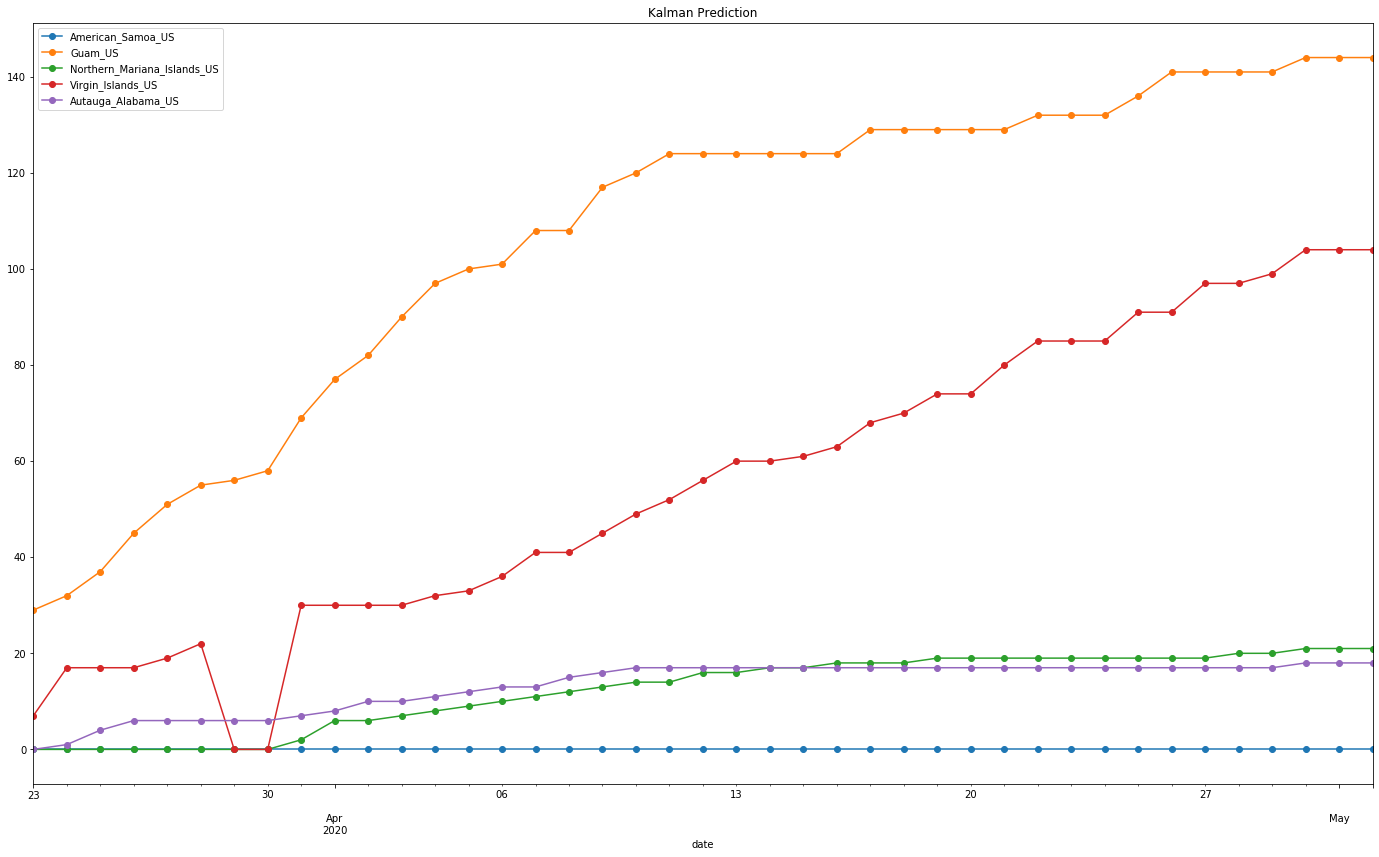

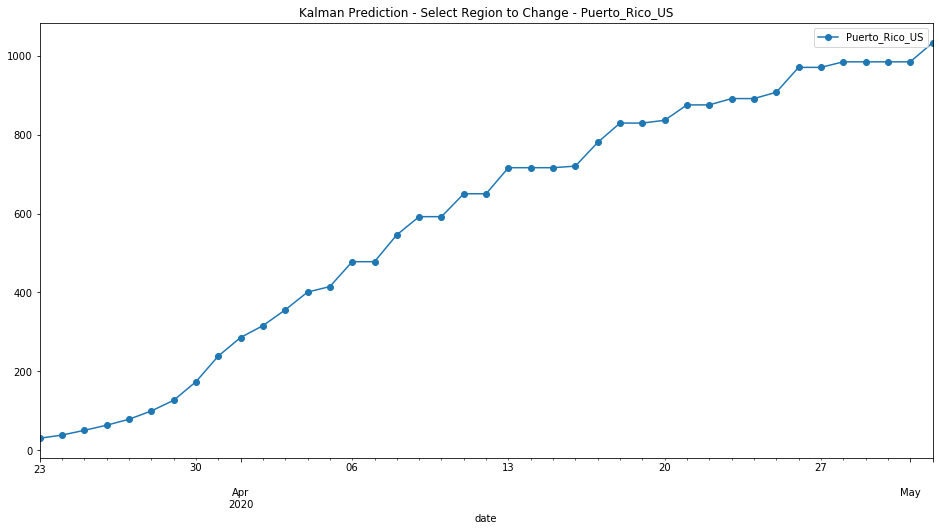

In [30]:
region=['date','American_Samoa_US', 'Guam_US',
       'Northern_Mariana_Islands_US', 'Virgin_Islands_US',
       'Autauga_Alabama_US']
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')

p_kalman2=all_new[['date','Puerto_Rico_US']]
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p_kalman2.columns[0]))